In [27]:
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

In [28]:
tf.compat.v1.disable_eager_execution()
tf.compat.v1.disable_v2_behavior()

# X = [1,2,3,4] <=> [x0,x1,x2,x3]
# Y = [2] <=> w_init + w_0*x_0 + w_1*x_1 + ... + w_3*x3
=> Việc của thuật toán này là đi tìm w0 , w1 , ... , w3

In [2]:
# tạo x_data với 10000 cột và 2 chiều
x_data = np.random.random((10000,2))
# fake sample_weight    
sample_weight  = np.array([3,4]).reshape(2,)
# fake y_data
y_data = np.matmul(x_data,sample_weight)

In [3]:
x_data

array([[0.84671089, 0.658203  ],
       [0.62202993, 0.86292363],
       [0.91277846, 0.70478171],
       ...,
       [0.8180233 , 0.56432968],
       [0.40724188, 0.00526496],
       [0.46195828, 0.75404966]])

# Xấp xỉ hóa Y để cho dữ liệu mang tính ngẫu nhiên

In [4]:
y_data = np.add(y_data,np.random.uniform(-0.5,0.5))

In [5]:
y_data[0]

5.158565365695133

In [6]:
y_data.shape

(10000,)

In [7]:
x_data.shape

(10000, 2)

In [8]:
y_data = y_data.reshape(10000,1)

In [9]:
y_data.shape

(10000, 1)

In [10]:
x_data

array([[0.84671089, 0.658203  ],
       [0.62202993, 0.86292363],
       [0.91277846, 0.70478171],
       ...,
       [0.8180233 , 0.56432968],
       [0.40724188, 0.00526496],
       [0.46195828, 0.75404966]])

In [11]:
y_data

array([[5.15856537],
       [5.30340503],
       [5.54308294],
       ...,
       [4.69700933],
       [1.22840618],
       [4.38769418]])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train , x_test , y_train , y_test = train_test_split(x_data , y_data , train_size=0.8 , test_size=0.2 , random_state=42)

In [14]:
x_train.shape

(8000, 2)

In [15]:
y_train.shape

(8000, 1)

# Tìm giá trị làm cho Min square Error

In [16]:
print(tf.__version__)

2.11.0


In [19]:
n_dim = x_train.shape[1]
print(n_dim)

2


In [22]:
# Placeholder for pass data
x = tf.compat.v1.placeholder(tf.float32,[None , n_dim])

y = tf.compat.v1.placeholder(tf.float32 ,[None , 1])

In [23]:
# Training weights
w = tf.Variable(tf.ones([n_dim,1]))
b = tf.Variable(np.random.randn() , dtype=tf.float32)

In [24]:
pred = tf.add(tf.matmul(x,w),b)

In [33]:
loss = tf.reduce_mean(tf.square(pred-y))
learning_rate = 0.001
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

In [34]:
init = tf.compat.v1.global_variables_initializer()

In [35]:
sess = tf.compat.v1.Session()

# Training

In [56]:
sess.run(init)
epochs = 40000 # hệ số training
lst_loss = [] # Dùng để thêm vào các loss xem nó giảm ra sao 
for epochs in range(epochs):
    sess.run(optimizer,feed_dict={x:x_train , y:y_train})
    test_loss = sess.run(loss , feed_dict={x:x_test , y:y_test}) # xem thuật toán chạy có ok hay không
    lst_loss.append(test_loss)
    if epochs % 2000 == 0:
        print("Epochs: {0} , Test loss: {1}".format(epochs,test_loss))
print("Training finished")
#print(lst_loss)

Epochs: 0 , Test loss: 2.075953722000122
Epochs: 2000 , Test loss: 0.5317798256874084
Epochs: 4000 , Test loss: 0.34366583824157715
Epochs: 6000 , Test loss: 0.22245290875434875
Epochs: 8000 , Test loss: 0.14413708448410034
Epochs: 10000 , Test loss: 0.09346763789653778
Epochs: 12000 , Test loss: 0.0606488436460495
Epochs: 14000 , Test loss: 0.03937334939837456
Epochs: 16000 , Test loss: 0.02557164803147316
Epochs: 18000 , Test loss: 0.016613202169537544
Epochs: 20000 , Test loss: 0.010795964859426022
Epochs: 22000 , Test loss: 0.00701708672568202
Epochs: 24000 , Test loss: 0.004561716224998236
Epochs: 26000 , Test loss: 0.0029659392312169075
Epochs: 28000 , Test loss: 0.0019286135211586952
Epochs: 30000 , Test loss: 0.0012542569311335683
Epochs: 32000 , Test loss: 0.0008156934636645019
Epochs: 34000 , Test loss: 0.0005306581151671708
Epochs: 36000 , Test loss: 0.0003451546945143491
Epochs: 38000 , Test loss: 0.00022458549938164651
Training finished


In [57]:
sess.run(w)

array([[2.9725945],
       [3.9691358]], dtype=float32)

In [43]:
sess.run(b)

1.9693333

In [44]:
import matplotlib.pyplot as plt 

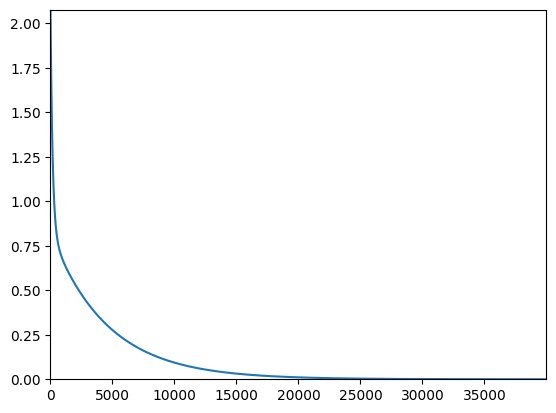

In [58]:
plt.plot(range(len(lst_loss)) , lst_loss)
plt.axis([0 , epochs , 0 , np.max([lst_loss])])
plt.show()

In [59]:
pred_y = sess.run(pred , feed_dict={
    x : [[3,10]]
})  

In [60]:
print(pred_y)

[[48.625374]]
